Завдання

https://cms.ucu.edu.ua/mod/vpl/view.php?id=306617

Розробити функцію sort_songs(song_titles, length_songs, key), що сортує пісні за вказаним параметром (key). Функція при виклику приймає наступні аргументи:

параметр song_titles - це список назв пісень (наприклад гурту Океан Ельзи);

параметр length_songs - це відповідний список тривалостей пісень;

параметр key - ключ за яким буде здійснюватися сортування.

Функція повертає один відсортований список кортежів першим елементом якого є назва пісні, а другим тривалість цієї пісні. Серед ключів обов'язково передбачити сотрування за тривалістю пісень (song_length), за довжиною назви (title_length) та за першою літерою останнього слова назви (last_word). Якщо списки мають різну довжину, або їх елементи не є відповідного типу, то функція повинна повернути None. Заборонено використовувати анонімні функції у якості ключів.

In [5]:
'''
Sorts Song
'''
from collections.abc import Callable

def song_length(x: tuple[str]) -> float:
    '''
    Sorts song length
    '''
    return float(x[1])

def title_length(x: tuple[str]) -> int:
    '''
    Sorts by title length
    '''
    return len(x[0])

def last_word(x: tuple[str]) -> str:
    '''
    Sorts by last word
    '''
    lst = x[0].split(' ')
    return lst[-1][0]

def sort_songs(
    song_titles: list[str],
    length_songs: list[str],
    key_: Callable[[tuple], int | str | float]) -> list[tuple] | None:
    '''
    Sorts songs by the specified key parameter
    >>> sort_songs(['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', \
'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд'], ['3.19', '3.58', '5.06', '4.31', '4.39', \
'3.52', '4.24', '3.39', '3.43', '3.17', '2.21'], song_length)
    [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), \
('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), \
('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
    '''
    lst = []
    counter = 0

    if len(song_titles) == len(length_songs):
        for i in length_songs:
            lst.append((song_titles[counter], i))
            counter += 1
            lst.sort()
        lst.sort(key = key_)
        return lst

sort_songs(['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', \
'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд'], ['3.19', '3.58', '5.06', '4.31', '4.39', \
'3.52', '4.24', '3.39', '3.43', '3.17', '2.21'], title_length)


[('Етюд', '2.21'),
 ('Сосни', '4.31'),
 ('Африка', '4.24'),
 ('Поясни', '3.39'),
 ('Фіалки', '3.43'),
 ('Кавачай', '4.39'),
 ('Відпусти', '3.52'),
 ('Той день', '3.58'),
 ('Мало мені', '5.06'),
 ('Янанебібув', '3.19'),
 ('Коли тебе нема', '3.17')]

In [2]:
import unittest

class TestSortSongs(unittest.TestCase):
    def test_sort_songs(self):
        # Test normal input
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        # Testing song length sorting
        expected = [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), ('Фіалки', '3.43'), 
                    ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), expected)

        # Testing title length sorting
        expected = [('Етюд', '2.21'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Поясни', '3.39'), ('Фіалки', '3.43'), 
                    ('Той день', '3.58'), ('Африка', '4.24'), ('Відпусти', '3.52'), ('Мало мені', '5.06'), ('Янанебібув', '3.19'), ('Коли тебе нема', '3.17')]
        self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected)
        
        # Testing last word sorting
        expected = [('Африка', '4.24'), ('Етюд', '2.21'), ('Кавачай', '4.39'), ('Коли тебе нема', '3.17'), ('Мало мені', '5.06'),
                    ('Поясни', '3.39'), ('Сосни', '4.31'), ('Той день', '3.58'), ('Відпусти', '3.52'), ('Фіалки', '3.43'), ('Янанебібув', '3.19')]
        self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected)

        # Test mismatched lengths
        mismatched_lengths = length_songs + ['3.00']
        self.assertIsNone(sort_songs(song_titles, mismatched_lengths, song_length))

        # Test incorrect data types
        incorrect_song_titles = ['Янанебібув', 123, 'Мало мені']
        incorrect_lengths = ['3.19', 5.06, '4.31']
        self.assertIsNone(sort_songs(incorrect_song_titles, length_songs, song_length))
        self.assertIsNone(sort_songs(song_titles, incorrect_lengths, song_length))

        # Test empty lists
        self.assertEqual(sort_songs([], [], song_length), [])
        
        # Test single element
        single_title = ['Янанебібув']
        single_length = ['3.19']
        expected_single = [('Янанебібув', '3.19')]
        self.assertEqual(sort_songs(single_title, single_length, song_length), expected_single)

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_sort_songs (__main__.TestSortSongs.test_sort_songs) ... FAIL

FAIL: test_sort_songs (__main__.TestSortSongs.test_sort_songs)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_1208\729944920.py", line 16, in test_sort_songs
    self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected)
AssertionError: Lists differ: [('Ет[30 chars]), ('Африка', '4.24'), ('Поясни', '3.39'), ('Ф[151 chars]17')] != [('Ет[30 chars]), ('Кавачай', '4.39'), ('Поясни', '3.39'), ('[151 chars]17')]

First differing element 2:
('Африка', '4.24')
('Кавачай', '4.39')

  [('Етюд', '2.21'),
   ('Сосни', '4.31'),
-  ('Африка', '4.24'),
+  ('Кавачай', '4.39'),
   ('Поясни', '3.39'),
   ('Фіалки', '3.43'),
-  ('Кавачай', '4.39'),
+  ('Той день', '3.58'),
+  ('Африка', '4.24'),
   ('Відпусти', '3.52'),
-  ('Той день', '3.58'),
   ('Мало мені', '5.06'),
   ('Янанебібув', '3.19'),
   ('Коли те

Перше зауваження: всі тестові варіанти чат взяв з доктесту, який бкв у цій функції. Це погано, адже я і без модуля unittests можу перевірити правильність.

Друге зауваження: всі тестові випадки знаходяться в одній функції, тому я не можу добре побачити, де помилка і скільки тестів було пройдено добре.

Третє зауваження: його тест, який фейлиться, прописаний неправильно. Це вводить розробника в оману.

In [3]:
import unittest

class TestSortSongs(unittest.TestCase):
    def test_sort_songs(self):
        # Test normal input
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        # Testing song length sorting
        expected = [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), ('Фіалки', '3.43'), 
                    ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), expected)

        # Testing title length sorting
        expected = [('Етюд', '2.21'), ('Сосни', '4.31'), ('Той день', '3.58'), ('Поясни', '3.39'), ('Фіалки', '3.43'), 
                    ('Відпусти', '3.52'), ('Кавачай', '4.39'), ('Африка', '4.24'), ('Мало мені', '5.06'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19')]
        self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected)
        
        # Testing last word sorting
        expected = [('Африка', '4.24'), ('Етюд', '2.21'), ('Кавачай', '4.39'), ('Коли тебе нема', '3.17'), ('Мало мені', '5.06'),
                    ('Поясни', '3.39'), ('Сосни', '4.31'), ('Той день', '3.58'), ('Відпусти', '3.52'), ('Фіалки', '3.43'), ('Янанебібув', '3.19')]
        self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected)

        # Test mismatched lengths
        mismatched_lengths = length_songs + ['3.00']
        self.assertIsNone(sort_songs(song_titles, mismatched_lengths, song_length))

        # Test incorrect data types
        incorrect_song_titles = ['Янанебібув', 123, 'Мало мені']
        incorrect_lengths = ['3.19', 5.06, '4.31']
        self.assertIsNone(sort_songs(incorrect_song_titles, length_songs, song_length))
        self.assertIsNone(sort_songs(song_titles, incorrect_lengths, song_length))

        # Test empty lists
        self.assertEqual(sort_songs([], [], song_length), [])
        
        # Test single element
        single_title = ['Янанебібув']
        single_length = ['3.19']
        expected_single = [('Янанебібув', '3.19')]
        self.assertEqual(sort_songs(single_title, single_length, song_length), expected_single)

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_sort_songs (__main__.TestSortSongs.test_sort_songs) ... FAIL

FAIL: test_sort_songs (__main__.TestSortSongs.test_sort_songs)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_1208\3604786088.py", line 16, in test_sort_songs
    self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected)
AssertionError: Lists differ: [('Ет[30 chars]), ('Африка', '4.24'), ('Поясни', '3.39'), ('Ф[151 chars]17')] != [('Ет[30 chars]), ('Той день', '3.58'), ('Поясни', '3.39'), ([151 chars]19')]

First differing element 2:
('Африка', '4.24')
('Той день', '3.58')

  [('Етюд', '2.21'),
   ('Сосни', '4.31'),
-  ('Африка', '4.24'),
+  ('Той день', '3.58'),
   ('Поясни', '3.39'),
   ('Фіалки', '3.43'),
+  ('Відпусти', '3.52'),
   ('Кавачай', '4.39'),
+  ('Африка', '4.24'),
-  ('Відпусти', '3.52'),
-  ('Той день', '3.58'),
   ('Мало мені', '5.06'),
-  ('Янанебібув', '3.19'),
-  ('Коли

Після довгих пояснень чату GPT, як правильно рахувати довжину назви пісні, він так і не зміг нормально посортувати рядок, тому починаємо новий чат.

З другої спроби він отримав той самий промпт, але запропоновані ним тести стали значно кращими (мабуть, це залежить від випадку)

In [4]:
import unittest
# from sort_songs_module import sort_songs, song_length, title_length, last_word

class TestSortSongs(unittest.TestCase):
    
    def test_sort_songs_by_song_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), ('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), expected_result)

    def test_sort_songs_by_title_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Фіалки', '3.43'), ('Той день', '3.58'), ('Поясни', '3.39'), ('Африка', '4.24'), ('Янанебібув', '3.19'), ('Відпусти', '3.52'), ('Коли тебе нема', '3.17'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected_result)
    
    def test_sort_songs_by_last_word(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Янанебібув', '3.19'), ('Мало мені', '5.06'), ('Поясни', '3.39'), ('Кавачай', '4.39'), ('Той день', '3.58'), ('Сосни', '4.31'), ('Коли тебе нема', '3.17'), ('Відпусти', '3.52'), ('Фіалки', '3.43'), ('Африка', '4.24'), ('Етюд', '2.21')]
        self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected_result)

    def test_mismatched_list_lengths(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', '3.58']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

    def test_invalid_data_types(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', 'three point five eight', '5.06']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_invalid_data_types (__main__.TestSortSongs.test_invalid_data_types) ... ERROR
test_mismatched_list_lengths (__main__.TestSortSongs.test_mismatched_list_lengths) ... ok
test_sort_songs_by_last_word (__main__.TestSortSongs.test_sort_songs_by_last_word) ... FAIL
test_sort_songs_by_song_length (__main__.TestSortSongs.test_sort_songs_by_song_length) ... ok
test_sort_songs_by_title_length (__main__.TestSortSongs.test_sort_songs_by_title_length) ... FAIL

ERROR: test_invalid_data_types (__main__.TestSortSongs.test_invalid_data_types)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_1208\3255247236.py", line 32, in test_invalid_data_types
    self.assertIsNone(sort_songs(song_titles, length_songs, song_length))
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_1208\163355770.py", line 46, in sort_songs
    l

Цього разу чат GPT запропонував тести, які поділені на шрупи за типом тесту. Це значно полегшило пошук помилки.
По-друге, він запропонував тест на неправильні вхідні дані, який виправдано фейлиться в моїй функції.

Проте, проблема неправильних очікуваних результатів залишається суттєвою.

Виправлений код (обробка помилки неправильних даних)

In [1]:
'''
Sorts Song
'''
from collections.abc import Callable

def song_length(x: tuple[str]) -> float:
    '''
    Sorts song length
    '''
    return float(x[1])

def title_length(x: tuple[str]) -> int:
    '''
    Sorts by title length
    '''
    return len(x[0])

def last_word(x: tuple[str]) -> str:
    '''
    Sorts by last word
    '''
    lst = x[0].split(' ')
    return lst[-1][0]

def sort_songs(
    song_titles: list[str],
    length_songs: list[str],
    key_: Callable[[tuple], int | str | float]) -> list[tuple] | None:
    '''
    Sorts songs by the specified key parameter
    >>> sort_songs(['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', \
'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд'], ['3.19', '3.58', '5.06', '4.31', '4.39', \
'3.52', '4.24', '3.39', '3.43', '3.17', '2.21'], song_length)
    [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), \
('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), \
('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
    '''
    lst = []
    counter = 0
    if not all(isinstance(song, str) for song in song_titles) or\
        not all(leng[0].isdigit() for leng in length_songs):
        return None
    if len(song_titles) == len(length_songs):
        for i in length_songs:
            lst.append((song_titles[counter], i))
            counter += 1
            lst.sort()
        lst.sort(key = key_)
        return lst


In [14]:
import unittest
# from sort_songs_module import sort_songs, song_length, title_length, last_word

class TestSortSongs(unittest.TestCase):
    
    def test_sort_songs_by_song_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), ('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), expected_result)

    def test_sort_songs_by_title_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Сосни', '4.31'), ('Африка', '4.24'), ('Поясни', '3.39'), ('Фіалки', '3.43'), ('Кавачай', '4.39'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Мало мені', '5.06'), ('Янанебібув', '3.19'), ('Коли тебе нема', '3.17')]
        self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected_result)
    
    def test_sort_songs_by_last_word(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Янанебібув', '3.19'), ('Мало мені', '5.06'), ('Поясни', '3.39'), ('Кавачай', '4.39'), ('Той день', '3.58'), ('Сосни', '4.31'), ('Коли тебе нема', '3.17'), ('Відпусти', '3.52'), ('Фіалки', '3.43'), ('Африка', '4.24'), ('Етюд', '2.21')]
        self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected_result)

    def test_mismatched_list_lengths(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', '3.58']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

    def test_invalid_data_types(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', 'three point five eight', '5.06']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_invalid_data_types (__main__.TestSortSongs.test_invalid_data_types) ... ok
test_mismatched_list_lengths (__main__.TestSortSongs.test_mismatched_list_lengths) ... ok
test_sort_songs_by_last_word (__main__.TestSortSongs.test_sort_songs_by_last_word) ... FAIL
test_sort_songs_by_song_length (__main__.TestSortSongs.test_sort_songs_by_song_length) ... ok
test_sort_songs_by_title_length (__main__.TestSortSongs.test_sort_songs_by_title_length) ... ok

FAIL: test_sort_songs_by_last_word (__main__.TestSortSongs.test_sort_songs_by_last_word)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_1208\3370205524.py", line 22, in test_sort_songs_by_last_word
    self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected_result)
AssertionError: Lists differ: [('Африка', '4.24'), ('Відпусти', '3.52'), ([188 chars]17')] != [('Янанебібув', '3.19'), ('Мало мені', '5.06[188 chars]2

Я не розумію чому, але ШІ відмовляється писати правильні тесткейси. Коли я показую йому, що не так, він це виправляє, але з'являється інша помилка в послідовності. Тому мені прийшлося самій дописати їх.

In [17]:
import unittest
# from sort_songs_module import sort_songs, song_length, title_length, last_word

class TestSortSongs(unittest.TestCase):
    
    def test_sort_songs_by_song_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), ('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), expected_result)

    def test_sort_songs_by_title_length(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Етюд', '2.21'), ('Сосни', '4.31'), ('Африка', '4.24'), ('Поясни', '3.39'), ('Фіалки', '3.43'), ('Кавачай', '4.39'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Мало мені', '5.06'), ('Янанебібув', '3.19'), ('Коли тебе нема', '3.17')]
        self.assertEqual(sort_songs(song_titles, length_songs, title_length), expected_result)
    
    def test_sort_songs_by_last_word(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', '4.24', '3.39', '3.43', '3.17', '2.21']
        expected_result = [('Африка', '4.24'), ('Відпусти', '3.52'), ('Етюд', '2.21'), ('Кавачай', '4.39'), ('Поясни', '3.39'), ('Сосни', '4.31'), ('Фіалки', '3.43'), ('Янанебібув', '3.19'), ('Той день', '3.58'), ('Мало мені', '5.06'), ('Коли тебе нема', '3.17')]
        self.assertEqual(sort_songs(song_titles, length_songs, last_word), expected_result)

    def test_mismatched_list_lengths(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', '3.58']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

    def test_invalid_data_types(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', 'three point five eight', '5.06']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_invalid_data_types (__main__.TestSortSongs.test_invalid_data_types) ... ok
test_mismatched_list_lengths (__main__.TestSortSongs.test_mismatched_list_lengths) ... ok
test_sort_songs_by_last_word (__main__.TestSortSongs.test_sort_songs_by_last_word) ... ok
test_sort_songs_by_song_length (__main__.TestSortSongs.test_sort_songs_by_song_length) ... ok
test_sort_songs_by_title_length (__main__.TestSortSongs.test_sort_songs_by_title_length) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.009s

OK


Тепер перевіримо, чи зможе ШІ оптимізувати модуль для тестувань (наприклад, створити сетап функцію, щоб не переписувати кожного разу пісні)

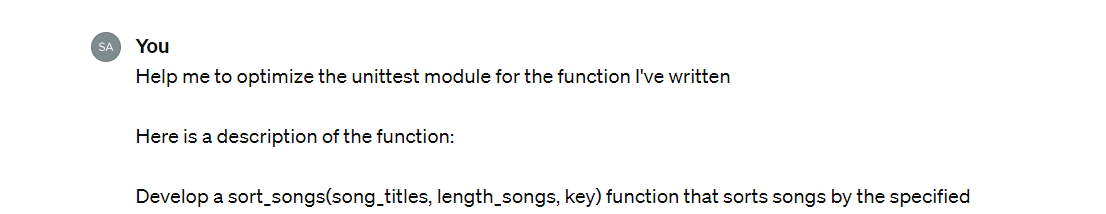

In [18]:
import unittest

class TestSortSongs(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        cls.song_titles = ['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', 
                           'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд']
        cls.length_songs = ['3.19', '3.58', '5.06', '4.31', '4.39', '3.52', 
                            '4.24', '3.39', '3.43', '3.17', '2.21']

    def test_sort_songs_by_different_keys(self):
        test_cases = [
            {'key': 'song_length', 'expected': [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), 
                                                ('Янанебібув', '3.19'), ('Поясни', '3.39'), 
                                                ('Фіалки', '3.43'), ('Відпусти', '3.52'), 
                                                ('Той день', '3.58'), ('Африка', '4.24'), 
                                                ('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]},
            {'key': 'title_length', 'expected': [('Етюд', '2.21'), ('Сосни', '4.31'), 
                                                 ('Африка', '4.24'), ('Поясни', '3.39'), 
                                                 ('Фіалки', '3.43'), ('Кавачай', '4.39'), 
                                                 ('Відпусти', '3.52'), ('Той день', '3.58'), 
                                                 ('Мало мені', '5.06'), ('Янанебібув', '3.19'), 
                                                 ('Коли тебе нема', '3.17')]},
            {'key': 'last_word', 'expected': [('Африка', '4.24'), ('Відпусти', '3.52'), 
                                              ('Етюд', '2.21'), ('Кавачай', '4.39'), 
                                              ('Поясни', '3.39'), ('Сосни', '4.31'), 
                                              ('Фіалки', '3.43'), ('Янанебібув', '3.19'), 
                                              ('Той день', '3.58'), ('Мало мені', '5.06'), 
                                              ('Коли тебе нема', '3.17')]}
        ]

        for case in test_cases:
            with self.subTest(case=case):
                key = case['key']
                expected_result = case['expected']
                
                # Use the appropriate sorting key function
                if key == 'song_length':
                    key_func = song_length
                elif key == 'title_length':
                    key_func = title_length
                elif key == 'last_word':
                    key_func = last_word
                else:
                    continue
                
                result = sort_songs(self.song_titles, self.length_songs, key_func)
                self.assertEqual(result, expected_result)

    def test_mismatched_list_lengths(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', '3.58']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

    def test_invalid_data_types(self):
        song_titles = ['Янанебібув', 'Той день', 'Мало мені']
        length_songs = ['3.19', 'three point five eight', '5.06']
        self.assertIsNone(sort_songs(song_titles, length_songs, song_length))

    def test_empty_inputs(self):
        song_titles = []
        length_songs = []
        self.assertEqual(sort_songs(song_titles, length_songs, song_length), [])

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_empty_inputs (__main__.TestSortSongs.test_empty_inputs) ... ok
test_invalid_data_types (__main__.TestSortSongs.test_invalid_data_types) ... ok
test_mismatched_list_lengths (__main__.TestSortSongs.test_mismatched_list_lengths) ... ok
test_sort_songs_by_different_keys (__main__.TestSortSongs.test_sort_songs_by_different_keys) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


Чат GPT добре оптимізував всі можливі тесткейси, врахував крайні випадки і створив setUp classmethod для списку пісень та їх тривалостей. Єдине, що, мабуть, є погано, це те, що всі тести, окрім крайніх випадків, знаходяться в одному методі. Якщо хоч один з тих випадків фейлиться, буде скдано знайти, який саме

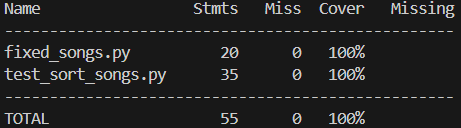

![Screenshot 2024-04-26 124843.png](<attachment:Screenshot 2024-04-26 124843.png>)
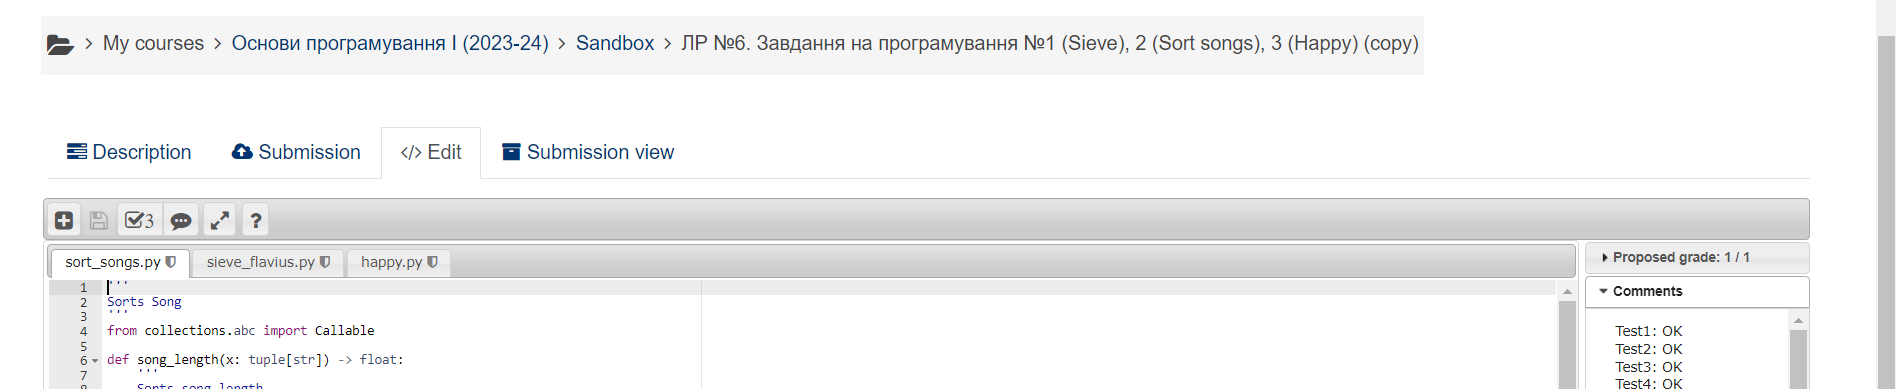